# Regression on Retails Sales Prediction
### By Rahul Inchal

### Problem Description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

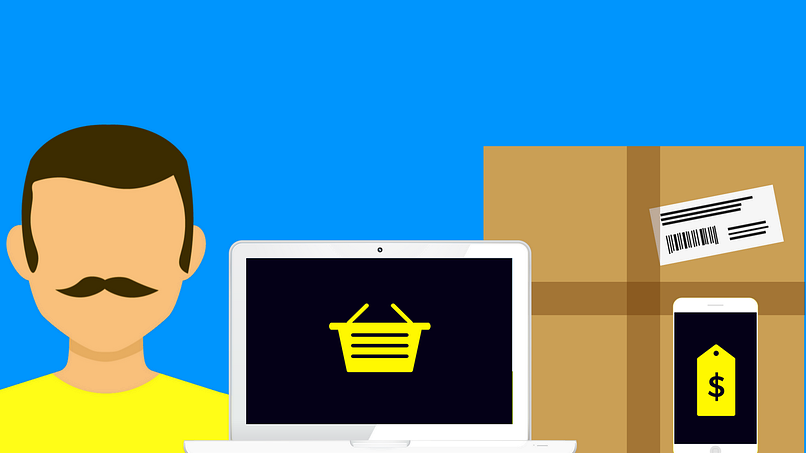

### GitHub
https://github.com/rahulinchal/Retail-Sales-Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# To show all the rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
rossmann = pd.read_csv("C:/Users\Rahul\Desktop\Data_Science\AlmaBetter\Machine Learning\Linear Regression\Project\Regression/Rossmann Stores Data.csv")
store = pd.read_csv("C:/Users\Rahul\Desktop\Data_Science\AlmaBetter\Machine Learning\Linear Regression\Project\Regression/store.csv")

## Data Description

### Rossmann Dataset
Most of the fields are self-explanatory. The following are descriptions for those that aren't. <br>
**1. Id** - an Id that represents a (Store, Date) duple within the test set <br>
**2. Store** - a unique Id for each store <br>
**3. Sales** - the turnover for any given day (this is what you are predicting) <br>
**4. Customers** - the number of customers on a given day <br>
**5. Open** - an indicator for whether the store was open: 0 = closed, 1 = open <br>
**6. StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None <br>
**7. SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools <br>

### Store Dataset
**1. StoreType** - differentiates between 4 different store models: a, b, c, d <br>
**2. Assortment** - describes an assortment level: a = basic, b = extra, c = extended <br>
**3. CompetitionDistance** - distance in meters to the nearest competitor store <br>
**4. CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened <br>
**5. Promo** - indicates whether a store is running a promo on that day <br>
**6. Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating <br>
**7. Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2 <br>
**8. PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Data Wrangling for Rossmann dataset

In [3]:
# Getting first 5 rows
rossmann.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#Getting sales vlaue count
rossmann['Sales'].value_counts().iloc[:5]

0       172871
5674       215
5558       197
5483       196
6214       195
Name: Sales, dtype: int64

In [5]:
# Getting shape of the rossmann data
rossmann.shape

(1017209, 9)

### Dropping all the entries from Sales column which has 0 sales. That 0 sales does not give any insights. And, Dropping all the data which has 0 as Open which indicates, that the store was not open. we can drop that as we are looking for sales happend and sales can only happen if the store is open.

In [6]:
rossmann = rossmann[rossmann['Sales'] != 0]
rossmann = rossmann[rossmann['Open'] != 0 ]

In [7]:
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
# Getting the value counts
rossmann['Open'].value_counts()

1    844338
Name: Open, dtype: int64

### Since open has only one value i.e., 1 we can drop it.

In [9]:
#Dropping the open column
rossmann.drop(['Open'], axis = 1, inplace = True)

In [10]:
#Finding the shape
rossmann.shape

(844338, 8)

In [11]:
# Getting first 5 rows
rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


### Finding the null value_counts

In [12]:
rossmann.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Finding the duplicated values

In [13]:
rossmann.duplicated().sum()

0

### Since there are no null values and no duplicated values. we can proceed with visualzation

In [14]:
# Getting the info of rossmann
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Date           844338 non-null  object
 3   Sales          844338 non-null  int64 
 4   Customers      844338 non-null  int64 
 5   Promo          844338 non-null  int64 
 6   StateHoliday   844338 non-null  object
 7   SchoolHoliday  844338 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 58.0+ MB


### Changing the format of date to datetime format

In [15]:
rossmann['Date'] = pd.to_datetime(rossmann['Date'])

### Extracting the year, month, day and, weekday from date column and dropping the date column

In [16]:
rossmann['Year'] = rossmann['Date'].dt.year
rossmann['Month'] = rossmann['Date'].dt.month
rossmann['Day'] = rossmann['Date'].dt.day
rossmann['Weekday'] = rossmann['Date'].dt.weekday

rossmann.drop(['Date'], axis = 1, inplace = True)

### Defining Weekday or weekend
**0 - Monday <br>
1 - Tuesday <br>
2 - Wednesday <br>
3 - Thursday <br>
4 - Friday <br>
5 - Saturday <br>
6- Sunday**

In [17]:
def weekend(val):
    if val == 5:
        return 1
    elif val == 6:
        return 1
    else:
        return 0

### Extracting weekday or weekend from weekday column

In [18]:
rossmann['Weekend'] = rossmann['Weekday'].apply(weekend)

In [19]:
# Getting random sample 
rossmann.sample(10)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend
4506,47,1,8633,973,1,0,1,2015,7,27,0,0
203664,735,5,7318,678,1,0,0,2015,1,30,4,0
599170,86,5,5704,672,1,0,0,2014,1,10,4,0
632870,336,3,13627,1986,0,0,0,2013,12,11,2,0
474248,44,5,7883,812,1,0,1,2014,5,2,4,0
321691,274,3,3686,955,1,0,0,2014,10,1,2,0
744354,320,1,14267,2051,0,0,0,2013,9,2,0,0
321220,830,4,6921,633,1,0,0,2014,10,2,3,0
116282,323,6,7261,646,0,0,0,2015,4,18,5,1
850555,596,4,4619,748,1,0,0,2013,5,30,3,0


In [20]:
# Getting info of the data
rossmann.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844338 non-null  int64 
 1   DayOfWeek      844338 non-null  int64 
 2   Sales          844338 non-null  int64 
 3   Customers      844338 non-null  int64 
 4   Promo          844338 non-null  int64 
 5   StateHoliday   844338 non-null  object
 6   SchoolHoliday  844338 non-null  int64 
 7   Year           844338 non-null  int64 
 8   Month          844338 non-null  int64 
 9   Day            844338 non-null  int64 
 10  Weekday        844338 non-null  int64 
 11  Weekend        844338 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ MB


### Finding the correlation of the rossmann data

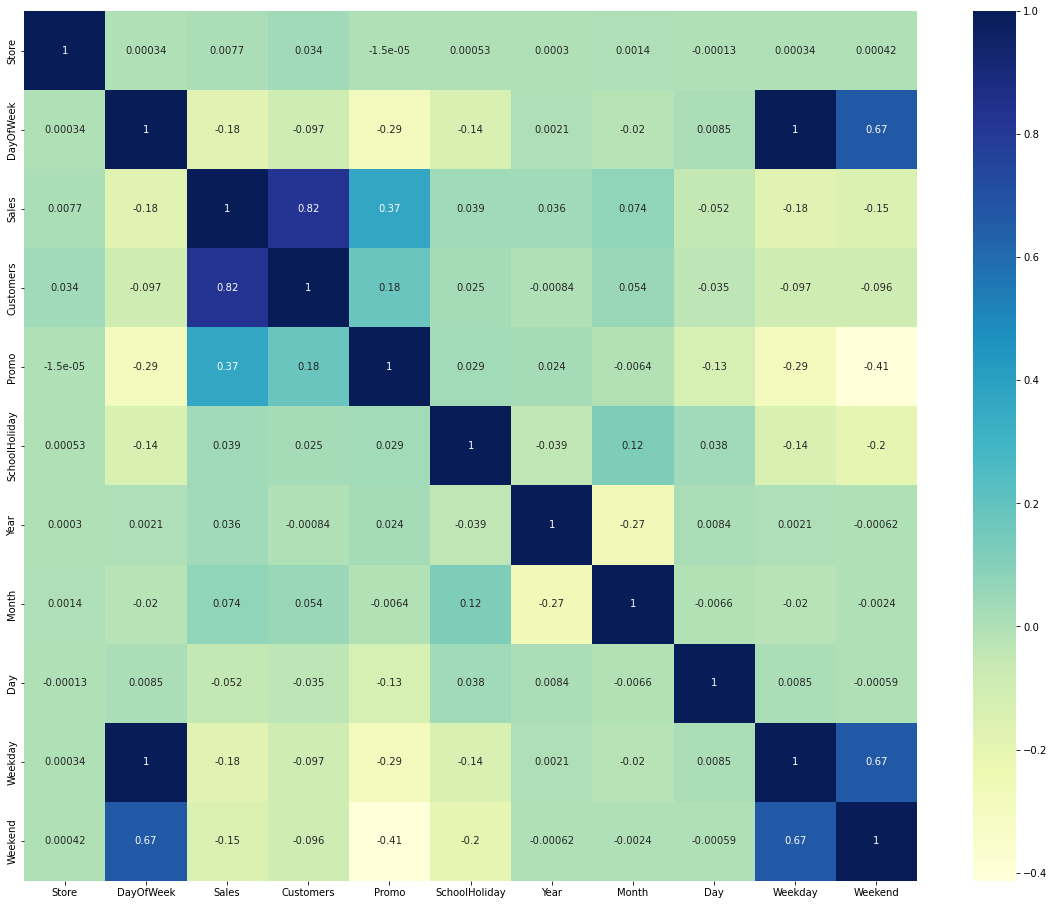

In [21]:
plt.figure(figsize = (20,16))
sns.heatmap(rossmann.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Exploring Store data 

In [22]:
#Getting the first 5 rows
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [23]:
# Getting the sum of null values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Cleaning the store dataset with appropriate mean, median and mode

In [24]:
# Replacing the NAN values with median
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

# Replacing NAN values with 0 in CompetitionOpenSinceMonth
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 in CompetitionOpenSinceYear
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
store['PromoInterval'].fillna(store['PromoInterval'].mode().values[0], inplace = True)

### Now checking NAN values


In [25]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
store.duplicated().sum()

0

### The data is free from null values and duplicated values

In [27]:
# Getting the info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [28]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


### Drawing the correlation

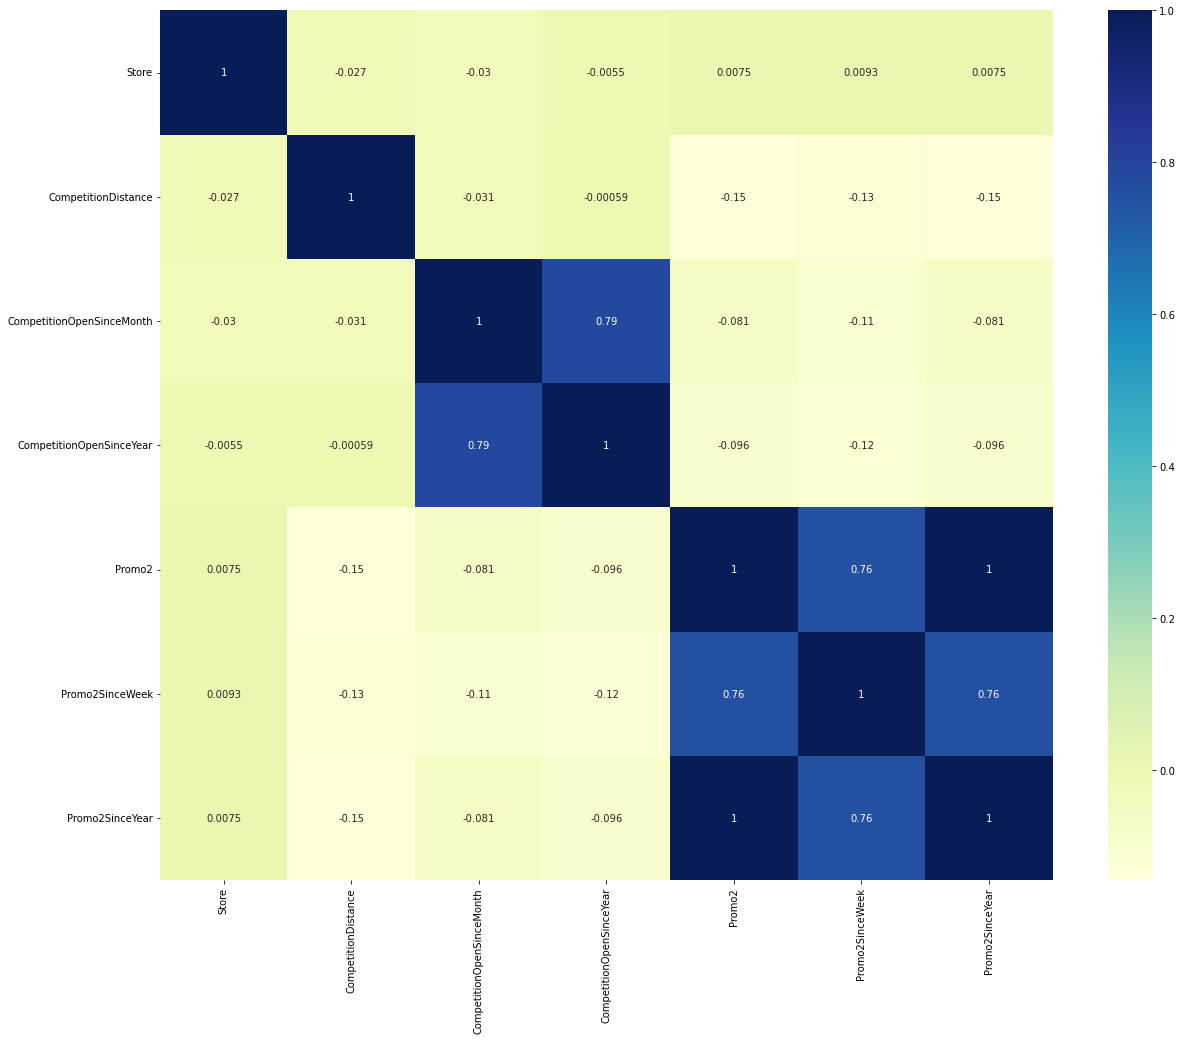

In [29]:
plt.figure(figsize = (20,16))
sns.heatmap(store.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Merging both the dataset and storing it in df

In [30]:
df = pd.merge(rossmann, store, on='Store',how='left')
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Sales                      844338 non-null  int64  
 3   Customers                  844338 non-null  int64  
 4   Promo                      844338 non-null  int64  
 5   StateHoliday               844338 non-null  object 
 6   SchoolHoliday              844338 non-null  int64  
 7   Year                       844338 non-null  int64  
 8   Month                      844338 non-null  int64  
 9   Day                        844338 non-null  int64  
 10  Weekday                    844338 non-null  int64  
 11  Weekend                    844338 non-null  int64  
 12  StoreType                  844338 non-null  object 
 13  Assortment                 84

<AxesSubplot:>

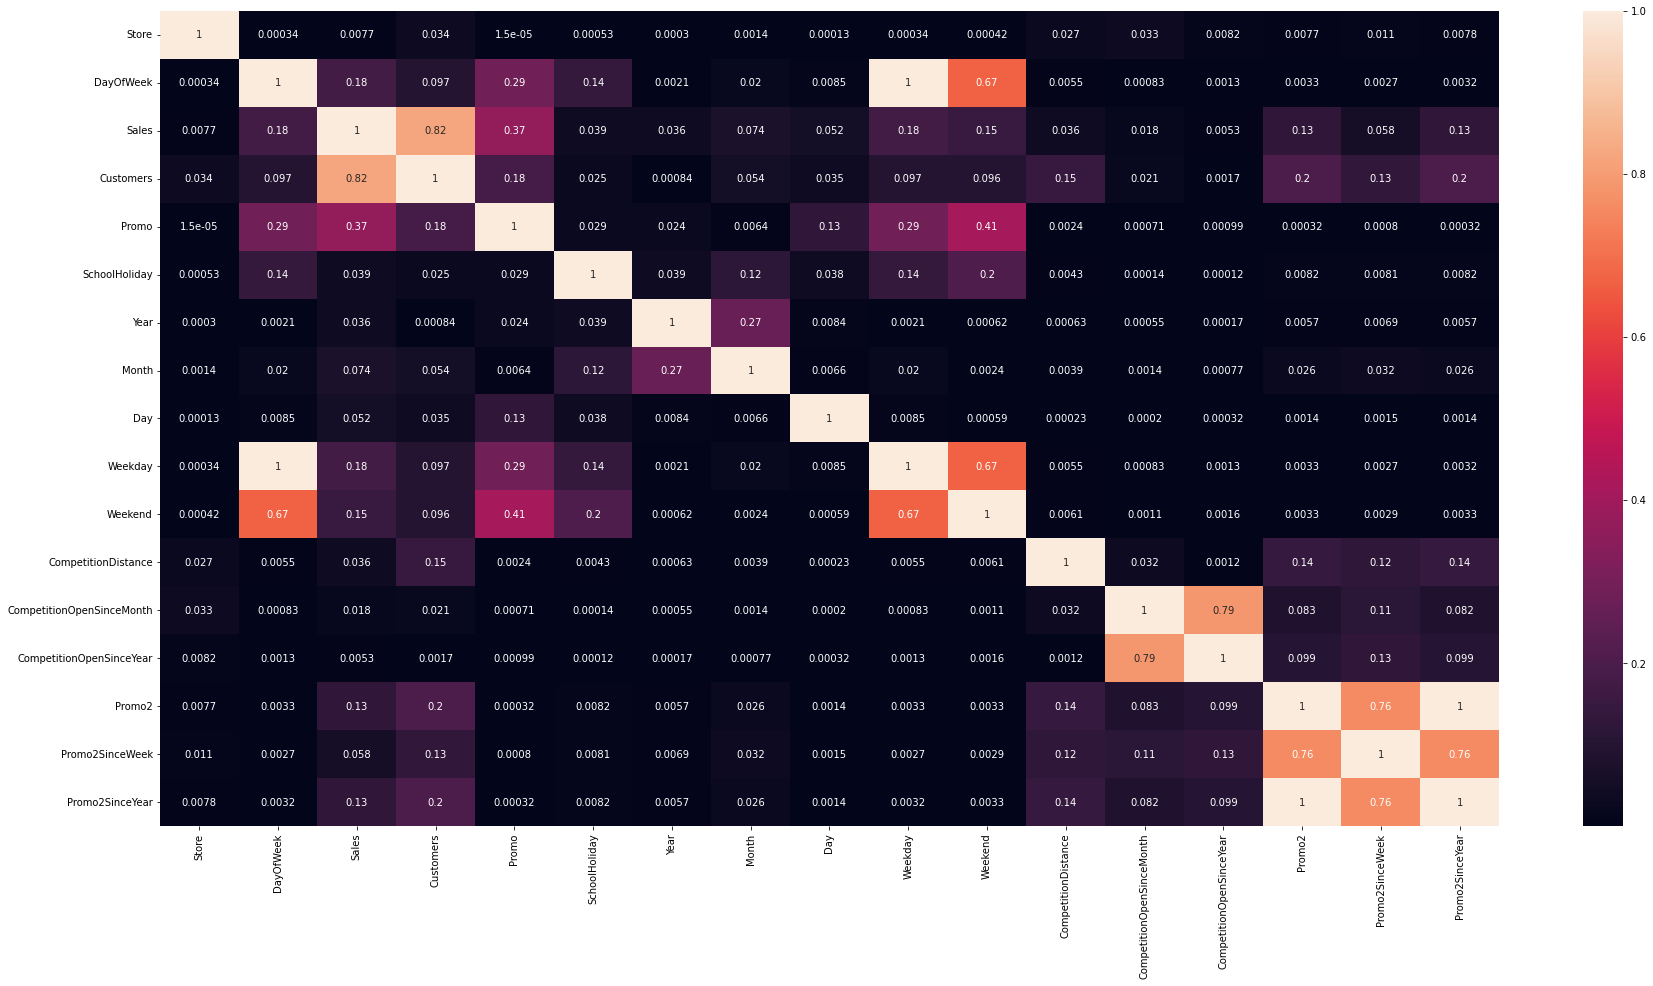

In [32]:
plt.figure(figsize = (30,15))
sns.heatmap(abs(df.corr()), annot = True)

### Data Visualization on df dataset

### 1. Year on year growth

In [33]:
# Getting first 5 rows
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


In [34]:
# Grouping the year with sales for visualization
year_on_sale = df.groupby(['Year'])['Sales'].mean()
year_on_sale

Year
2013    6814.775168
2014    7026.128505
2015    7088.235123
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Year on Year Growth')

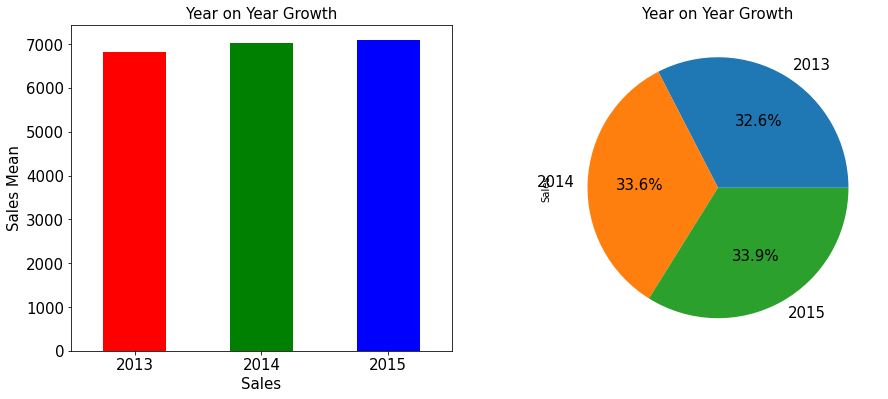

In [35]:
# Visualizong using bar graph
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
year_on_sale.plot(kind = 'bar', color = ['r', 'g', 'b'], fontsize = 15)
plt.xticks(rotation = 360)
plt.title("Year on Year Growth", fontsize = 15)
plt.xlabel("Sales", fontsize = 15)
plt.ylabel("Sales Mean",  fontsize = 15)

# Visualizing with pie plot
plt.subplot(1,2,2)
year_on_sale.plot(kind = 'pie', fontsize = 15, autopct = '%1.1f%%')
plt.title("Year on Year Growth", fontsize = 15)

### Observation
1. The year on year sales is increasing which is a good point for the company.
2. the YOY growth is positive yet it is very minimal.

### 2. Competition Open Since Year

In [36]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"Jan,Apr,Jul,Oct"


### Changing the datatype of CompetitionOpenSinceYear from float to int.

In [37]:
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0.0,"Jan,Apr,Jul,Oct"


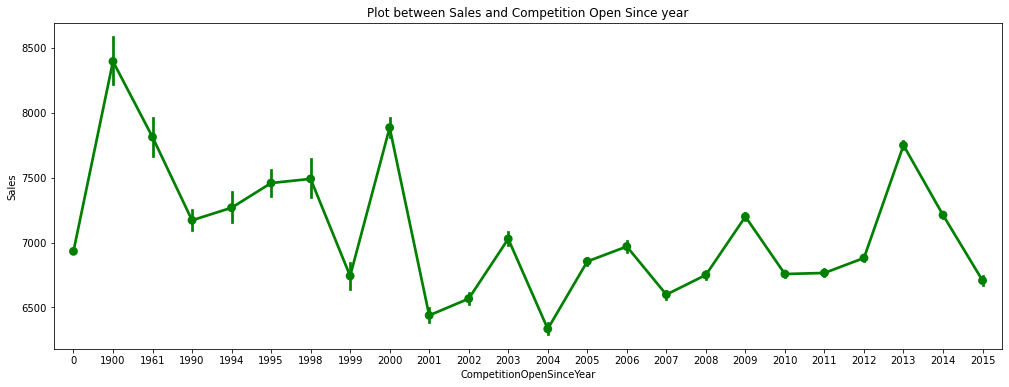

In [38]:
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x= df['CompetitionOpenSinceYear'], y= df['Sales'], color = 'g')
plt.title('Plot between Sales and Competition Open Since year')
plt.show()

### Observation
1. From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high.
2. As year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

### 3. Promo 2 Since Year

In [39]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0.0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0.0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0.0,"Jan,Apr,Jul,Oct"


### Changing the data type of Promo 2 Since Year from float to int

In [40]:
df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)

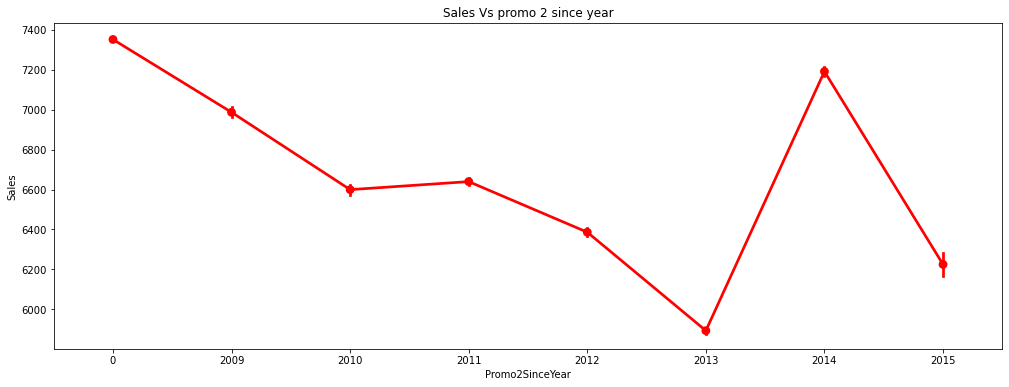

In [41]:
# Visualizing using point plot
plt.figure(figsize=(17,6))
sns.pointplot(data = df, x = df['Promo2SinceYear'], y = df['Sales'], color = 'r')
plt.title("Sales Vs promo 2 since year")
plt.show()

### Observation
1. Since year shows that effect of sales of stores which continue their promotion. this data is available from year 2009 to 2015. 
2. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

### 4. Day of Week

In [42]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


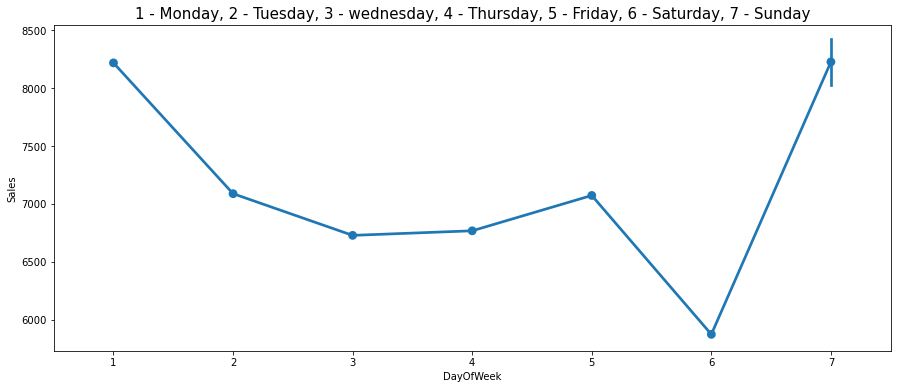

In [43]:
plt.figure(figsize=(15,6))
sns.pointplot(data = df, x = df['DayOfWeek'], y= df['Sales'])
plt.title("1 - Monday, 2 - Tuesday, 3 - wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday, 7 - Sunday", fontsize = 15)
plt.show()

### Observation
1. From monday till Saturday, the sale drop
2. On sunday the sale drastically goes up because its sunday.

### 5. Monthly sales

In [44]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


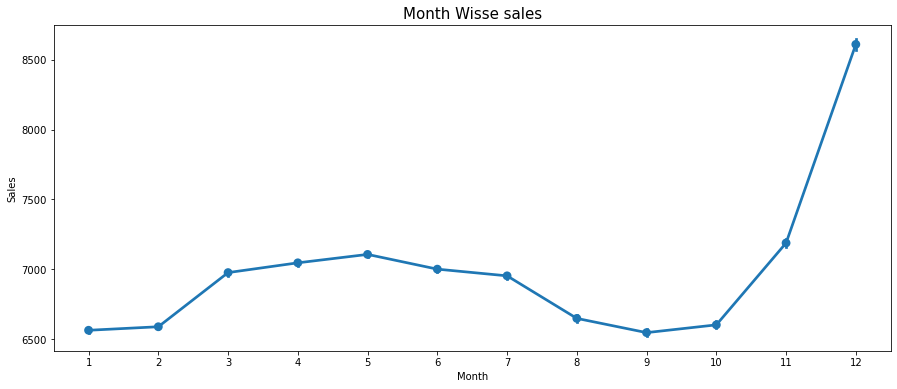

In [45]:
# Visualizing using pointplot
plt.figure(figsize = (15,6))
sns.pointplot(data = df, x = df['Month'], y = df['Sales'])
plt.title("Month Wisse sales", fontsize = 15)
plt.show()

### Observatoin
1. As we can see from the pointplot, the sale has a minimal of growth from january till may
2. after may it has a little dip in the salestill octber.
3. after october till november it has good growth in sale.
4. In december, the growth is unexceptionally good. This may be because of the holiday season including christmas and new years eve.

### 8. Analyzing December month sales

In [46]:
# Getting the First 5 rows
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


### Extracting only december month sales and storing it in december

In [47]:
december = df[df['Month'] == 12]
december.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
196029,1,3,2605,327,0,0,1,2014,12,31,2,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
196030,2,3,2269,252,0,0,1,2014,12,31,2,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
196031,3,3,3804,408,0,0,1,2014,12,31,2,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
196032,4,3,10152,1311,0,0,1,2014,12,31,2,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
196033,5,3,1830,217,0,0,1,2014,12,31,2,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


In [48]:
# Getting the value count
december.groupby(['Day'])['Sales'].mean()

Day
1     11026.264706
2     10642.079024
3      9352.908780
4      9150.200976
5      9804.197561
6      7273.598049
7      6567.294430
8      7083.043022
9      6798.685366
10     6520.997561
11     6595.880000
12     6839.711707
13     7215.386829
14     7212.126437
15    12969.971639
16    12802.247805
17    10993.843415
18    10730.676098
19    10370.127805
20     9898.003415
21     9128.383538
22    11704.693666
23    12225.453659
24     4802.694634
25     9029.424242
26    10364.078947
27     6770.175610
28     6102.494728
29     7831.228125
30     8711.160000
31     4112.417073
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Day', ylabel='Sales'>

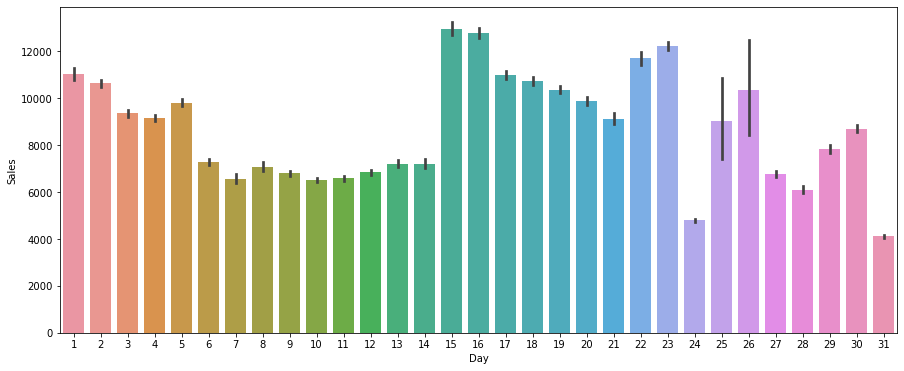

In [49]:
plt.figure(figsize = (15,6))
sns.barplot(data = december, x = december['Day'], y = december["Sales"])

### Observation
1. It looks like there is different kind of sales happening over there.
2. 15th and 16th has the highest of sales.
3. Third week looks like it is busy, sales are much higher than other weeks

### 9. Weekend sales 

In [50]:
df.sample(10)

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
465138,820,5,11108,1064,0,0,0,2014,2,14,4,0,a,c,1650.0,0.0,0,1,40.0,2014,"Jan,Apr,Jul,Oct"
638107,580,1,14361,2085,1,0,0,2013,8,12,0,0,a,c,170.0,2.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
722717,918,2,5768,596,1,0,0,2013,5,14,1,0,a,c,18710.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"
210694,648,4,6092,588,0,0,0,2014,12,11,3,0,d,a,2130.0,12.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
187679,305,6,5823,599,0,0,0,2015,1,10,5,1,c,c,2470.0,2.0,2005,1,31.0,2013,"Mar,Jun,Sept,Dec"
338115,184,4,7402,668,1,0,0,2014,7,3,3,0,d,c,3560.0,0.0,0,0,0.0,0,"Jan,Apr,Jul,Oct"
517757,105,2,6708,674,1,0,0,2013,12,17,1,0,a,c,6190.0,0.0,0,1,23.0,2013,"Mar,Jun,Sept,Dec"
177701,393,3,4305,440,0,0,0,2015,1,21,2,0,d,c,4820.0,3.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
486740,121,3,3984,456,1,0,0,2014,1,22,2,0,a,a,3570.0,11.0,2009,1,36.0,2013,"Mar,Jun,Sept,Dec"
358492,520,3,3551,442,0,0,0,2014,6,11,2,0,a,c,6900.0,0.0,0,1,40.0,2012,"Mar,Jun,Sept,Dec"


In [51]:
df.groupby(['Weekend'])['Sales'].mean()

Weekend
0    7172.903208
1    5932.264337
Name: Sales, dtype: float64

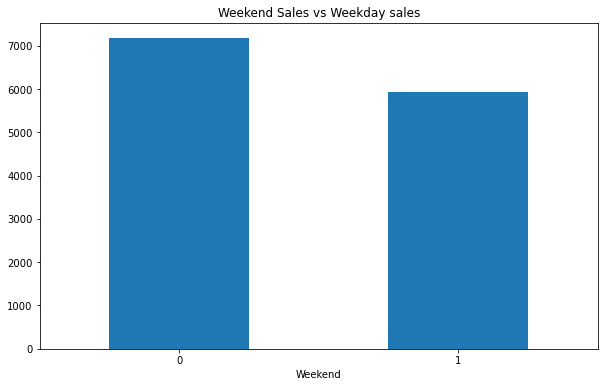

In [52]:
plt.figure(figsize = (10,6))
df.groupby(['Weekend'])['Sales'].mean().plot(kind = 'bar')
plt.xticks(rotation = 360)
plt.title("Weekend Sales vs Weekday sales")
plt.show()

### Observation
1. As per graph we can see that the sales happend in weekdays are more than weekend.
2. Still weekday consists of 5 days i.e., from monday to friday, and weekend consists of only 2 days, i.e., Saturday and sunday. But still the sales are almost comparable.
3. Which shows that weekend sales are higher.

### 10. Day wise sales

In [53]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


In [54]:
# Grouping the days from different month with mean of sales
day_wise_sales = df.groupby(['Day'])['Sales'].mean()
day_wise_sales

Day
1     8054.505835
2     7987.998803
3     7765.916826
4     7746.632622
5     7556.054806
6     7149.914351
7     7101.614663
8     6785.606424
9     6499.517013
10    6429.867986
11    6088.286098
12    6186.692977
13    6570.339941
14    6606.648700
15    7018.797807
16    7314.330149
17    7284.416418
18    7340.772490
19    7115.279322
20    6955.004553
21    6693.696159
22    6544.923929
23    6498.481514
24    5916.886849
25    5968.280641
26    6190.007567
27    6636.996208
28    6943.514789
29    7514.074032
30    8355.098655
31    7577.710796
Name: Sales, dtype: float64

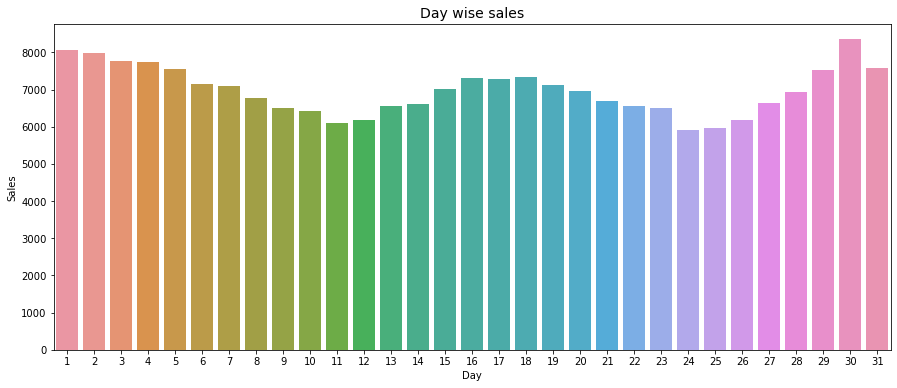

In [55]:
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = day_wise_sales.keys(), y = day_wise_sales)
plt.title("Day wise sales", Fontsize = 14)
plt.show()

### Observation
1. There is no particular trend as par say
2. But, we can see that at the starting of the month and at the end of the month the sales are pretty high.
3. Sales are high at the starting of the month can be related as the salary of most of the employee is credited at the end of the month.
4. The sales are high at the end of the month, could have been highly inspired by the december month sales as the december month has the highest sales of all the months. As we have taken the mean of the day sales from every month.

In [56]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270.0,9.0,2008,0,0.0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570.0,11.0,2007,1,13.0,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130.0,12.0,2006,1,14.0,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620.0,9.0,2009,0,0.0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910.0,4.0,2015,0,0.0,0,"Jan,Apr,Jul,Oct"


### Changing the datatype of all the other columns which should be in int datatype

In [57]:
# Changinf the datatype of CompetitionDistance from float to int
df['CompetitionDistance'] = df['CompetitionDistance'].astype(int)

In [58]:
# Changinf the datatype of CompetitionOpenSinceMonth from float to int
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)

In [59]:
# Changinf the datatype of Promo2SinceWeek from float to int
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)

In [60]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


### 11. Store type

In [61]:
store_type = df.groupby(['StoreType'])['Sales'].mean()
store_type

StoreType
a     6925.697986
b    10233.380141
c     6933.126425
d     6822.300064
Name: Sales, dtype: float64

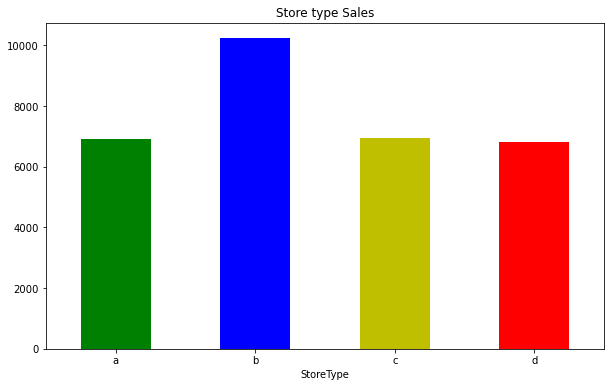

In [62]:
plt.figure(figsize = (10,6))
store_type.plot(kind = 'bar', color = ['g','b', 'y', 'r'])
plt.xticks(rotation = 360)
plt.title("Store type Sales")
plt.show()

### Observation
1. It is very clear from the graph that store type B has the highest number of sales
2. other than store B, all other store ahs almost equal sales

In [63]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


In [64]:
df.groupby(['PromoInterval'])['Sales'].mean()

PromoInterval
Feb,May,Aug,Nov     6427.367069
Jan,Apr,Jul,Oct     7123.437381
Mar,Jun,Sept,Dec    6215.888185
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Promo Interval')

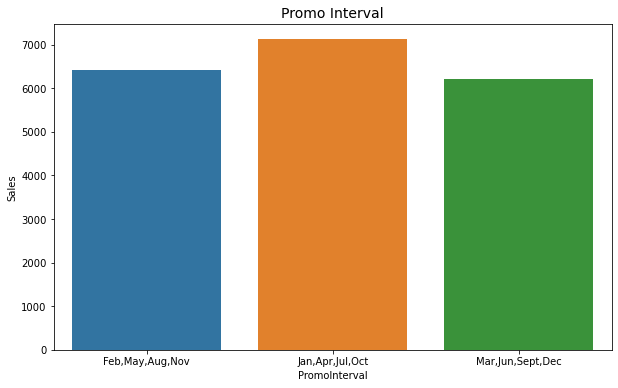

In [65]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = df.groupby(['PromoInterval'])['Sales'].mean().keys(),
            y =df.groupby(['PromoInterval'])['Sales'].mean())
plt.title("Promo Interval", fontsize = 14)

### Observation
1. It is very clear from the Graph that promo on JAN, APR, JUL and OCT has high sales
2. Other months has almost equal sales

In [66]:
df.head()

,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekday,Weekend,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,0,1,2015,7,31,4,0,c,a,1270,9,2008,0,0,0,"Jan,Apr,Jul,Oct"
1,2,5,6064,625,1,0,1,2015,7,31,4,0,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,8314,821,1,0,1,2015,7,31,4,0,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,13995,1498,1,0,1,2015,7,31,4,0,c,c,620,9,2009,0,0,0,"Jan,Apr,Jul,Oct"
4,5,5,4822,559,1,0,1,2015,7,31,4,0,a,a,29910,4,2015,0,0,0,"Jan,Apr,Jul,Oct"


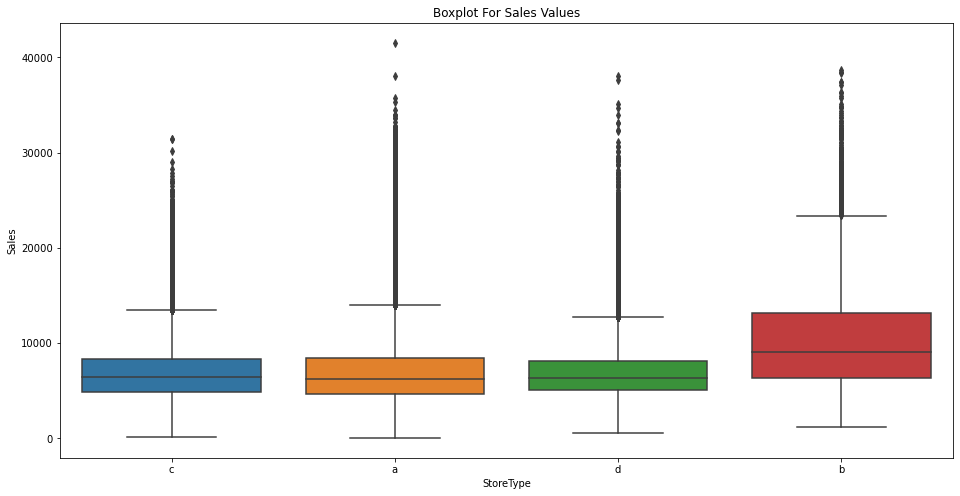

In [67]:
plt.figure(figsize = (16,8))
sns.boxplot(data = df, x = df['StoreType'], y = df['Sales'])
plt.title('Boxplot For Sales Values')
plt.show()

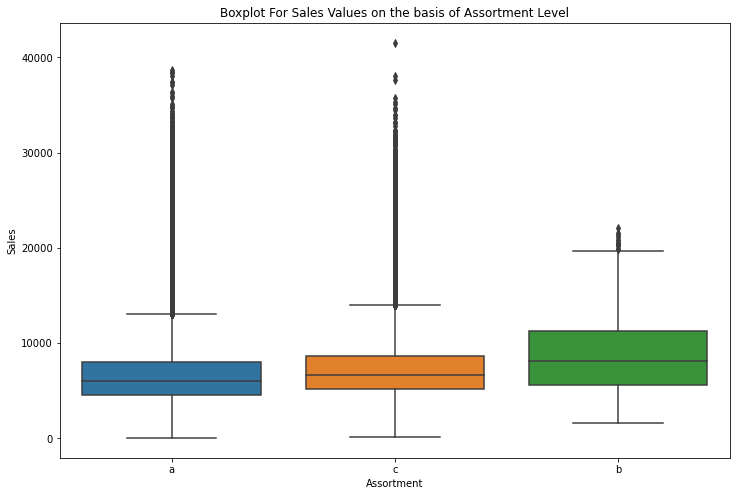

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="Assortment", y="Sales", data=df)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')
plt.show()

### Observation
There are a lot of outliers but we cannot remove them as they belong to sales and there can be price of any articles which may cost much higher than normam range.

## Observation from Exploratory Data Analysis

1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.   
2)From plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.  
3)Plot between Promotion and Sales shows that promotion helps in increasing Sales.   
4)Type of Store plays an important role in opening pattern of stores.   
5)All Type ‘b’ stores never closed except for refurbishment or other reason.  
6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.   
7)ssortment Level ‘b’ is only offered at Store Type ‘b’.   
8)We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.



# Data visulaization is done and we head towards model building

### Multicollinearity
Multicollinearity occurs when two or more independent variables(also known as predictor) are highly correlated with one another in a regression model.

This means that an independent variable can be predicted from another independent variable in a regression model. For Example, height, and weight, student consumption and father income, age and experience, mileage and price of a car, etc.

Let us take a simple example from our everyday life to explain this. Assume that we want to fit a regression model using the independent features such as pocket money and father income, to find the dependent variable, Student consumption here we cannot find an exact or individual effect of all the independent variables on the dependent variable or response since here both independent variables are highly correlated means as father income increases pocket money also increases and if father income decreases pocket money also decreases.

This is the multicollinearity problem!

### The problem with having multicollinearity
Since in a regression model our research objective is to find out how each predictor is impacting the target variable individually which is also an assumption of a method namely Ordinary Least Squares through which we can find the parameters of a regression model.
So finally to fulfill our research objective for a regression model we have to fix the problem of multicollinearity which is finally important for our prediction also.

Let say we have the following linear equation

Y=a0+a1*X1+a2*X2

Here X1 and X2 are the independent variables. The mathematical significance of a1 is that if we shift our X1 variable by 1 unit then our Y shifts by a1 units keeping X2 and other things constant. Similarly, for a2 we have if we shift X2 by one unit means Y also shifts by one unit keeping X1 and other factors constant.

But for a situation where multicollinearity exists our independent variables are highly correlated, so if we change X1 then X2 also changes and we would not be able to see their Individual effect on Y which is our research objective for a regression model.

**This makes the effects of X1 on Y difficult to differentiate  from the effects of X2 on Y.**

### Detecting Multicollinearity using VIF
VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. “
or
VIF score of an independent variable represents how well the variable is explained by other independent variables.
R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF which is denoted below:

                                                            VIF=1/(1-R^2)

So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

1. VIF starts at 1(when R^2=0, VIF=1 – minimum value for VIF) and has no upper limit. <br>
2. VIF = 1, no correlation between the independent variable and the other variables. <br>
3. VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others. <br>
4. Some researchers assume VIF > 5 as a serious issue for our model while some researchers assume VIF>10 as serious, it varies from person to person. <br>
5. We believe in if VIF > 10, then we should drop it.

In [69]:
# Defining a function calc_vif to calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [70]:
# Calculating the VIF
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.004515e+00
1,DayOfWeek,1.113329e+08
2,Customers,1.130739e+00
3,Promo,1.267857e+00
4,SchoolHoliday,1.063788e+00
5,Year,1.079123e+00
6,Month,1.097185e+00
7,Day,1.021230e+00
8,Weekday,6.756015e+07
9,Weekend,2.059925e+00


### Since all the column Variance Inflation Factor is less than 10, we are good to go.

### One hot encoding for df

In [71]:
df = pd.get_dummies(df, columns = ['StoreType','Assortment','PromoInterval', 'StateHoliday'])
df.sample(10)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,Weekday,Weekend,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_0,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
816510,1045,4,7008,911,0,0,2013,1,31,3,0,26990,12,2013,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
235347,1066,2,11356,1084,1,0,2014,11,11,1,0,3350,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
716086,1022,3,5135,645,0,0,2013,5,22,2,0,1520,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
165491,472,2,5902,737,1,0,2015,2,3,1,0,5030,8,2011,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
440565,798,3,5797,841,0,0,2014,3,12,2,0,9560,4,2001,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
833247,12,6,6342,789,0,0,2013,1,12,5,1,1070,0,0,1,13,2010,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0
115981,69,4,7548,1021,0,0,2015,3,26,3,0,1130,0,0,1,40,2011,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
584876,921,2,13915,1534,1,0,2013,10,8,1,0,840,9,2006,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
28144,186,4,4724,390,1,0,2015,7,2,3,0,290,10,2011,1,40,2014,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
107876,997,2,3920,376,0,1,2015,4,7,1,0,5840,7,2010,1,37,2009,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [72]:
# Getting the info of the new final dataset before the model is built.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 844337
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   Store                           844338 non-null  int64
 1   DayOfWeek                       844338 non-null  int64
 2   Sales                           844338 non-null  int64
 3   Customers                       844338 non-null  int64
 4   Promo                           844338 non-null  int64
 5   SchoolHoliday                   844338 non-null  int64
 6   Year                            844338 non-null  int64
 7   Month                           844338 non-null  int64
 8   Day                             844338 non-null  int64
 9   Weekday                         844338 non-null  int64
 10  Weekend                         844338 non-null  int64
 11  CompetitionDistance             844338 non-null  int32
 12  CompetitionOpenSinceMonth       844338 non-n

### Defining X and Y

In [73]:
# Create the data of independent variables
x = df.drop(['Sales'], axis = 1).values

# Create the data of dependent variable
y = df['Sales'].values

### Splitting the data into training and testing

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [75]:
# Printing the shape of the train and test dataset
print(x_train.shape)
print(x_test.shape)

(591036, 31)
(253302, 31)


In [76]:
# Getting the coefficient before scaling
x_train

array([[ 569,    4,  743, ...,    0,    0,    0],
       [1045,    6,  622, ...,    0,    0,    0],
       [ 112,    3,  694, ...,    0,    0,    0],
       ...,
       [ 927,    3,  679, ...,    0,    0,    0],
       [ 533,    1, 1124, ...,    0,    0,    0],
       [ 586,    3, 2463, ...,    0,    0,    0]], dtype=int64)

## Feature Scaling
#### What is Feature Scaling?
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

In order to visualize the above, let us take an example of the independent variables of alcohol and Malic Acid content in the wine dataset from the “Wine Dataset” that is deposited on the UCI machine learning repository. Below you can see the impact of the two most common scaling techniques (Normalization and Standardization) on the dataset.

### Normalization
Also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization is given as:

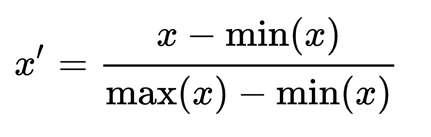
Here, max(x) and min(x) are the maximum and the minimum values of the feature respectively.

### Standardization
Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

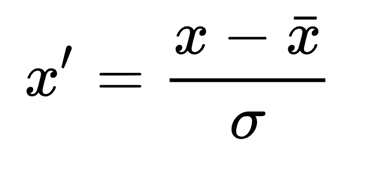
Here, σ is the standard deviation of the feature vector, and x̄ is the average of the feature vector.



In [77]:
# Importing MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [78]:
# Getting the coeficient after scaling
x_train

array([[0.50987433, 0.5       , 0.1339774 , ..., 0.        , 0.        ,
        0.        ],
       [0.93716338, 0.83333333, 0.11192125, ..., 0.        , 0.        ,
        0.        ],
       [0.09964093, 0.33333333, 0.12504557, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.83123878, 0.33333333, 0.12231134, ..., 0.        , 0.        ,
        0.        ],
       [0.47755835, 0.        , 0.2034269 , ..., 0.        , 0.        ,
        0.        ],
       [0.52513465, 0.33333333, 0.44750273, ..., 0.        , 0.        ,
        0.        ]])

## Linear Regression
Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.

The linear regression model provides a sloped straight line representing the relationship between the variables. Consider the below image:

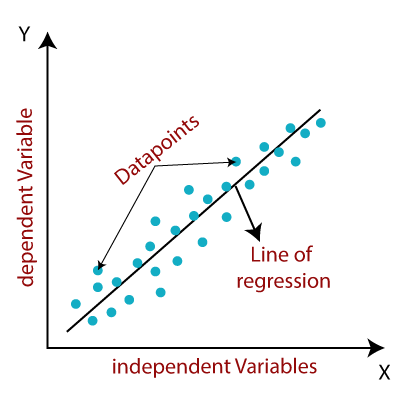

Mathematically, we can represent a linear regression as:

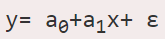

Here,

Y= Dependent Variable (Target Variable)
X= Independent Variable (predictor Variable)
a0= intercept of the line (Gives an additional degree of freedom)
a1 = Linear regression coefficient (scale factor to each input value).
ε = random error

The values for x and y variables are training datasets for Linear Regression model representation.

### Finding the best fit line:
When working with linear regression, our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. The best fit line will have the least error.

The different values for weights or the coefficient of lines (a0, a1) gives a different line of regression, so we need to calculate the best values for a0 and a1 to find the best fit line, so to calculate this we use cost function.

In [79]:
# Importing the LinearRegression model from SCIKIT learn
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Predicting the results

In [80]:
#Prediction the value
y_pred = lr.predict(x_test)
y_pred

array([5412., 9541., 8826., ..., 5417., 3783., 6381.])

## Checking for overfitting and underfitting via score

### Overfitting
Overfitting occurs when our machine learning model tries to cover all the data points or more than the required data points present in the given dataset. Because of this, the model starts caching noise and inaccurate values present in the dataset, and all these factors reduce the efficiency and accuracy of the model. The overfitted model has low bias and high variance

The chances of occurrence of overfitting increase as much we provide training to our model. It means the more we train our model, the more chances of occurring the overfitted model.

Overfitting is the main problem that occurs in supervised learning.

Example: The concept of the overfitting can be understood by the below graph of the linear regression output:

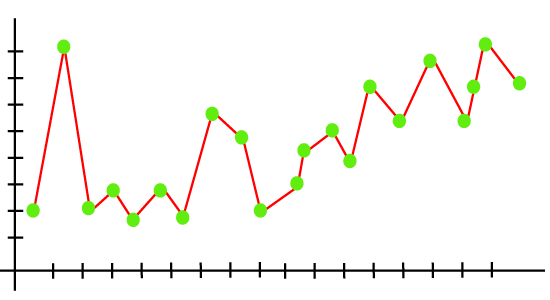

### How to avoid the Overfitting in Model
Both overfitting and underfitting cause the degraded performance of the machine learning model. But the main cause is overfitting, so there are some ways by which we can reduce the occurrence of overfitting in our model.

**Cross-Validation** <br>
**Training with more data** <br>
**Removing features** <br>
**Early stopping the training** <br>
**Regularization** <br>
**Ensembling** <br>

### Underfitting
Underfitting occurs when our machine learning model is not able to capture the underlying trend of the data. To avoid the overfitting in the model, the fed of training data can be stopped at an early stage, due to which the model may not learn enough from the training data. As a result, it may fail to find the best fit of the dominant trend in the data.

In the case of underfitting, the model is not able to learn enough from the training data, and hence it reduces the accuracy and produces unreliable predictions.
An underfitted model has high bias and low variance.
Example: We can understand the underfitting using below output of the linear regression model:

Example: We can understand the underfitting using below output of the linear regression model:

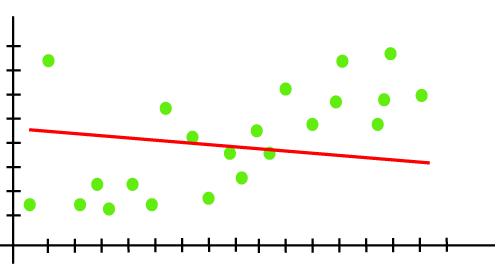

### How to avoid underfitting:
**By increasing the training time of the model.** <br>
**By increasing the number of features.** <br>

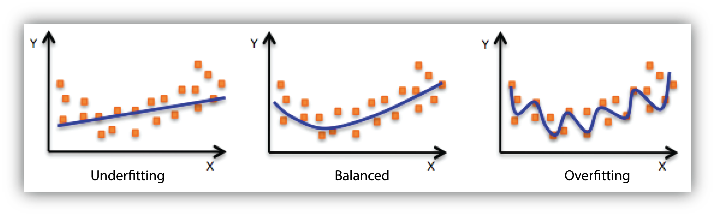

In [81]:
# Checking the score
(lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100

(83.13598548669133, 83.02147636736112)

### The model is good as it shows no overfitting and underfitting

### Visualizing through scatter plot

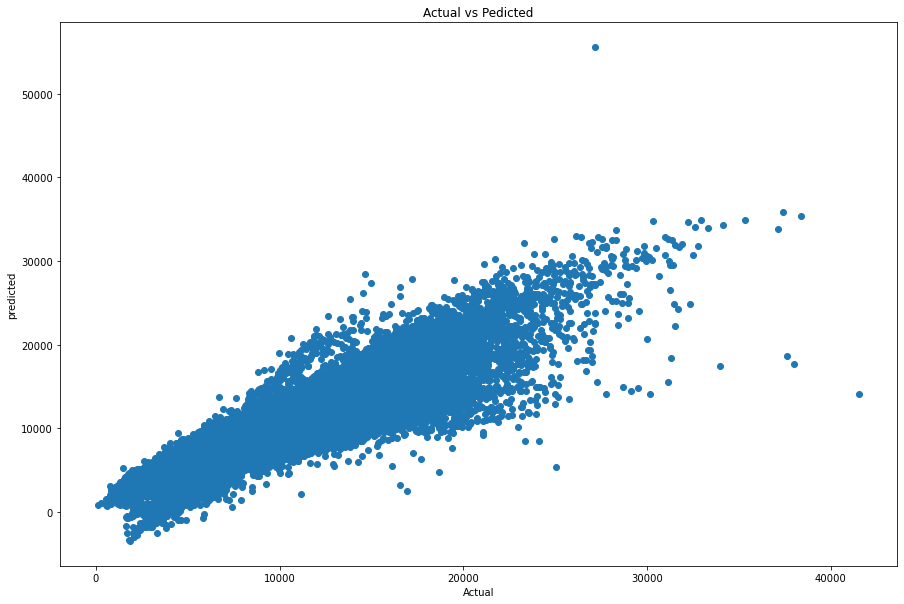

In [82]:
# Visualizing the actual and predicted values
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [83]:
# Getting the difference between actial and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
28814,6768,6535.0,233.0
244981,7187,5430.0,1757.0
204085,5574,6356.0,-782.0
108837,12313,10034.0,2279.0
28082,5186,6251.0,-1065.0
73849,3666,4155.0,-489.0
16583,4631,5201.0,-570.0
88532,11664,12180.0,-516.0
168367,15856,14854.0,1002.0
126302,10142,8277.0,1865.0


## Evaluation Metrics
### 1) Mean Absolute Error(MAE)
MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

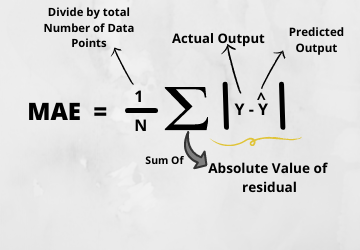

**Advantages of MAE**

* The MAE you get is in the same unit as the output variable.
* It is most Robust to outliers.

**Disadvantages of MAE**

* The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.
from sklearn.metrics import mean_absolute_error <br>
print("MAE",mean_absolute_error(y_test,y_pred))<br>

Now to overcome the disadvantage of MAE next metric came as MSE.

### 2) Mean Squared Error(MSE)
MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

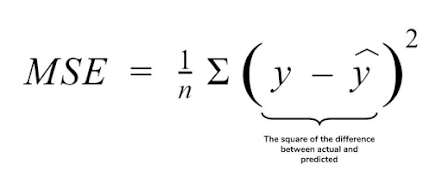

### 3) Root Mean Squared Error(RMSE)
As RMSE is clear by the name itself, that it is a simple square root of mean squared error.

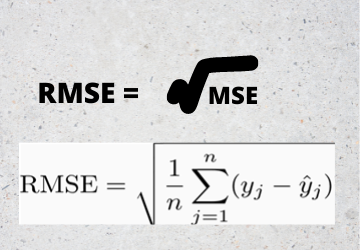

**Advantages of RMSE**
* The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

**Disadvantages of RMSE**
* It is not that robust to outliers as compared to MAE.
for performing RMSE we have to NumPy NumPy square root function over MSE.

print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE.

### 4) R Squared (R2)
R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.

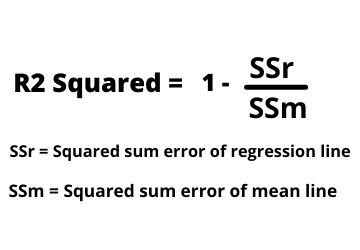

Now, how will you interpret the R2 score? suppose If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.

The normal case is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

from sklearn.metrics import r2_score <br>
r2 = r2_score(y_test,y_pred) <br>
print(r2) <br>

### 5) Adjusted R Squared
The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.

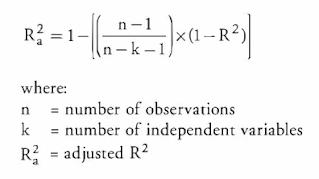

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the R2 score will increase and 1-R2 will decrease heavily and the denominator will also decrease so the complete term decreases, and on subtracting from one the score increases.

n=40 <br>
k=2 <br>
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1)) <br>
print(adj_r2_score) <br>
Hence, this metric becomes one of the most important metrics to use during the evaluation of the model.

In [84]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 1634385.8327806334
RMSE : 1278.4310043098271
R2 Linear regression : 83.02147636736112


### Ridge Regressor
Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

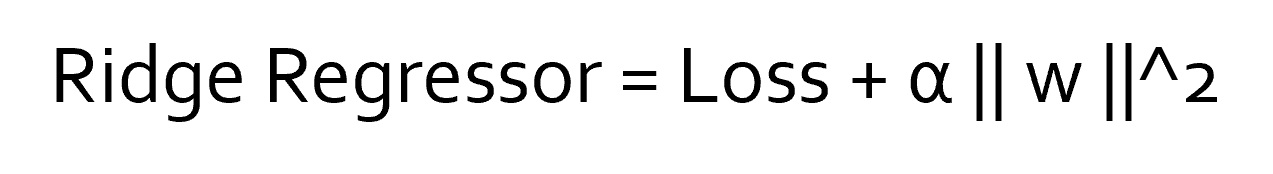

In [85]:
# Importing the Packages
from sklearn.linear_model import Ridge

In [86]:
# Training the model
ridgeregressor = Ridge(alpha = 1)
ridgeregressor.fit(x_train, y_train)

Ridge(alpha=1)

In [87]:
# Predicting the model
ridge_y_pred = ridgeregressor.predict(x_test)
ridge_y_pred

array([5430.44329481, 9640.84686164, 8846.01347188, ..., 5434.00126928,
       3836.57738926, 6385.57486628])

### Checking for over fitting and underfitting

In [88]:
(ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100

(83.10648312317585, 82.9935717666623)

In [89]:
# Coefficient Difference
ridge_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Ridge coefficient': ridgeregressor.coef_ , 'Difference' : lr.coef_ - ridgeregressor.coef_})
ridge_coef.head()

,lr coefficient,Ridge coefficient,Difference
0,-1.273546e+02,-133.710670,6.356104e+00
1,-5.023677e+14,-386.979154,-5.023677e+14
2,4.038269e+04,40362.595235,2.009370e+01
3,1.273898e+03,1272.088629,1.809051e+00
4,1.201098e+02,119.539089,5.706943e-01


### Calculating the errors

In [90]:
MSE_ridge = mean_squared_error(y_test, ridge_y_pred)
print("MSE :",MSE_ridge)

RMSE_ridge = np.sqrt(MSE)
print("RMSE :", RMSE_ridge)

r2_ridge = r2_score(y_test, ridge_y_pred)
print("R2 Ridge :" ,(r2_ridge)*100)

MSE : 1637071.9841232565
RMSE : 1278.4310043098271
R2 Ridge : 82.9935717666623


### Lasso regressor
Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models. Lasso models can be evaluated using various metrics such as RMSE and R-Square.

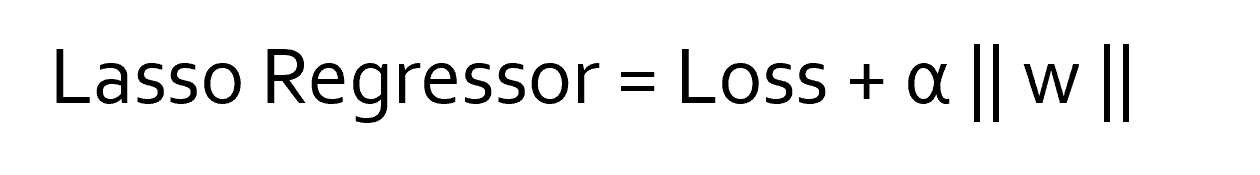

In [91]:
# Impoting the lasso regression
from sklearn.linear_model import Lasso

In [92]:
# Training the model
lassoregressor = Lasso(alpha = 0.01)
lassoregressor.fit(x_train, y_train)

Lasso(alpha=0.01)

In [93]:
# Predicting the model
lasso_y_pred = lassoregressor.predict(x_test)
lasso_y_pred

array([5431.24338062, 9650.84068688, 8848.7046781 , ..., 5434.76643973,
       3840.67747624, 6385.57520508])

### Checking for overfitting and underfitting

In [94]:
(lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100

(83.10105823567568, 82.9880313592222)

### Calculating the errors

In [95]:
MSE_lasso = mean_squared_error(y_test, lasso_y_pred)
print("MSE :",MSE_lasso)

RMSE_lasso = np.sqrt(MSE)
print("RMSE :", RMSE_lasso)

r2_lasso = r2_score(y_test, lasso_y_pred)
print("R2 Lasso :" ,(r2_lasso)*100)

MSE : 1637605.314560216
RMSE : 1278.4310043098271
R2 Lasso : 82.9880313592222


In [96]:
# Coeficient difference
lasso_coef = pd.DataFrame({'lr coefficient':lr.coef_ , 'Ridge coefficient': lassoregressor.coef_ , 'Difference' : lr.coef_ - lassoregressor.coef_})
lasso_coef.head()

,lr coefficient,Ridge coefficient,Difference
0,-1.273546e+02,-134.216404,6.861838e+00
1,-5.023677e+14,-2197.060597,-5.023677e+14
2,4.038269e+04,40377.777239,4.911694e+00
3,1.273898e+03,1271.661643,2.236036e+00
4,1.201098e+02,119.537363,5.724195e-01


## Decision Tree
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

1. Conditions [Decision Nodes]
2. Result [End Nodes] 

The branches/edges represent the truth/falsity of the statement and take makes a decision based on that in the example below which shows a decision tree that evaluates the smallest of three numbers:  

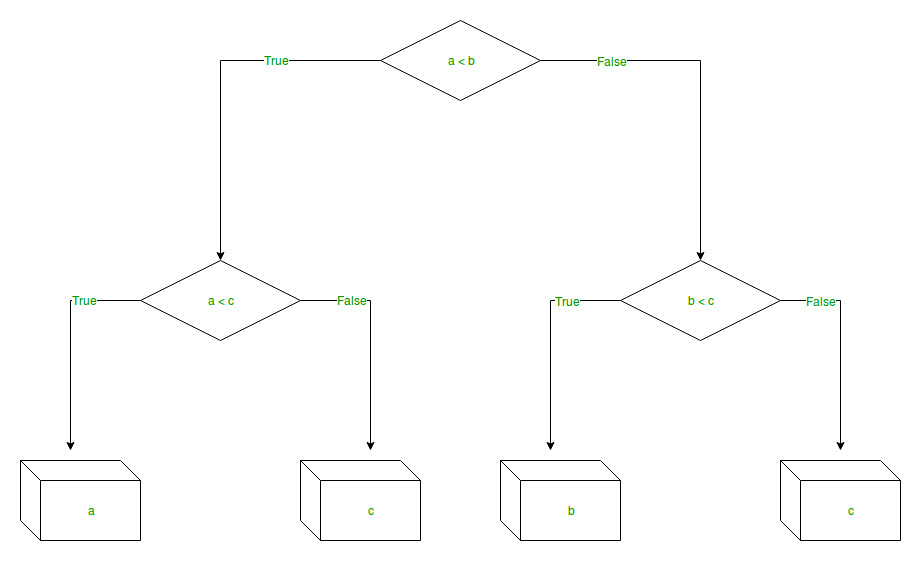

In [97]:
# Importing the packages
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

# Fitting the train model
decision_tree.fit(x_train, y_train)

# Predicting from the model 
DT_y_pred = decision_tree.predict(x_test)
DT_y_train = decision_tree.predict(x_train)

# Finding the error
MSE = mean_squared_error(y_test,DT_y_pred)
print("MSE:", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

# Adjusted r2
r2 = r2_score(y_test, DT_y_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 682042.69991912
RMSE : 825.8587651161183
R2 for Decision Tree Regressor :  92.91472192992273


### Checking for overfitting and underfitting

In [98]:
(decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100

(93.91514479964471, 92.91472192992273)

In [99]:
# Calculating the difference between actual value and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_y_pred, 'Difference': y_test - DT_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
194184,9335,9881.854072,-546.854072
183565,15253,14356.547414,896.452586
49094,4001,5011.630102,-1010.630102
202004,8952,9330.958333,-378.958333
187830,4991,5841.965517,-850.965517
213720,4502,4242.427526,259.572474
130649,7040,6954.826923,85.173077
251933,8458,8331.159898,126.840102
253158,4949,5595.275974,-646.275974
193974,5553,4797.718876,755.281124


## Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

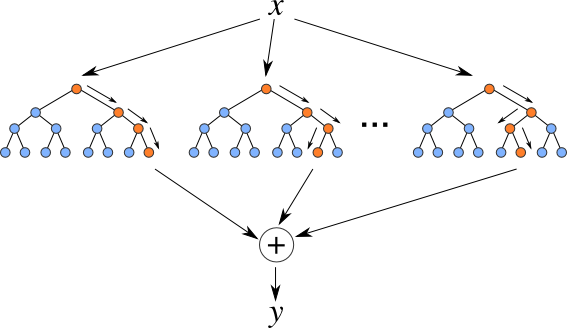

In [100]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Setting the hyperparameter values
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_y_pred = random_forest.predict(x_test)

# Mean squared error
MSE = mean_squared_error(y_test, rf_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R2
r2 = r2_score(y_test, rf_y_pred)
print("R2 for Random Forest :", r2*100)

MSE : 1222792.6224151433
RMSE : 1105.799539887381
R2 for Random Forest : 87.29723849712387


### Checking for over fitting and underfitting

In [101]:
(random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100

(87.40577373648053, 87.29723849712387)

In [102]:
# Calculating the difference between actual and predicted value
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_y_pred, 'Difference': y_test - rf_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
93171,6431,6092.959514,338.040486
198890,8138,9066.789325,-928.789325
160444,7243,5749.038204,1493.961796
52211,6745,6092.959514,652.040486
183185,3169,3886.008610,-717.008610
166395,3782,3860.319350,-78.319350
99620,4921,6346.879227,-1425.879227
96859,6529,7190.016326,-661.016326
123886,6535,6782.851987,-247.851987
93686,8320,8625.505350,-305.505350


### Printing all the scores

In [103]:
print("Linear Regression : ", (lr.score(x_train, y_train))*100,",", (lr.score(x_test, y_test))*100)
print("Ridge Regressor : ", (ridgeregressor.score(x_train, y_train))*100,",", (ridgeregressor.score(x_test, y_test))*100)
print("Lasso Regressor : ", (lassoregressor.score(x_train, y_train))*100,",", (lassoregressor.score(x_test, y_test))*100)
print("Decision Tree Regressor : ", (decision_tree.score(x_train, y_train))*100,",", (decision_tree.score(x_test, y_test))*100)
print("Random Forest Regressor : ", (random_forest.score(x_train, y_train))*100,",", (random_forest.score(x_test, y_test))*100)

Linear Regression :  83.13598548669133 , 83.02147636736112
Ridge Regressor :  83.10648312317585 , 82.9935717666623
Lasso Regressor :  83.10105823567568 , 82.9880313592222
Decision Tree Regressor :  93.91514479964471 , 92.91472192992273
Random Forest Regressor :  87.40577373648053 , 87.29723849712387


### Printing all the scores using dataframe

In [104]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                               'Ridge Regressor': ((ridgeregressor.score(x_train, y_train))*100, (ridgeregressor.score(x_test, y_test))*100),
                              'Lasso Regressor': ((lassoregressor.score(x_train, y_train))*100, (lassoregressor.score(x_test, y_test))*100),
                              'Decision Tree Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100)})
overall_scores.T

,0,1
Linear Regression,83.135985,83.021476
Ridge Regressor,83.106483,82.993572
Lasso Regressor,83.101058,82.988031
Decision Tree Regressor,93.915145,92.914722
Random Forest Regressor,87.405774,87.297238


### Observation
This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis.  <br>
A) Linear Regression Analysis <br>
B) Elastic Regression (Lasso & Ridge Regression) <br>
C) Dession tree
D) Random Forest